In [1]:
#confusion matrix, accuracy, recall
import pandas as pd
path='../input/breast-cancer-wisconsin-data/data.csv'
file= pd.read_csv(path)

file=file.dropna(how='all',axis=1)

In [2]:
file.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
print(file.isna().count())

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: i

In [4]:
file.isnull().count()
y=file.pop('diagnosis')
file.drop(labels='id',axis=1,inplace=True,errors='ignore')

In [5]:
print(file.isna().count())

radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64


In [6]:
#đổi m,b trong y-> 1,0
import numpy as np
y_np=y.to_numpy()
np.place(y_np,y_np=='M',1)
np.place(y_np,y_np=='B',0)
y=pd.Series(y_np)
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(file,y,test_size=0.3,random_state=0)

In [8]:
y_train.value_counts()

0    249
1    149
dtype: int64

In [9]:
y_test.value_counts()

0    108
1     63
dtype: int64

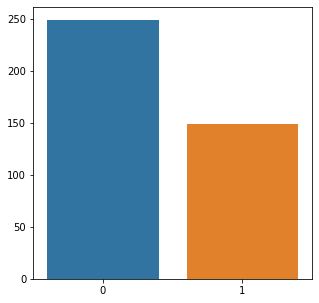

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def count(y):   
    return y.value_counts()

def bias_barplot(y):
  plt.figure(figsize=(5,5))
  ax=sns.barplot( x=[0,1],y=[np.count_nonzero(y==0),np.count_nonzero(y==1)])

bias_barplot(y_train)
plt.show()

In [11]:
import math
def sigmoid(x):
    return round(1/(1+np.exp(-x)),6)

def min_max_scale(dataset):
  for i in range(len(dataset.T)):
    z=np.zeros(len(dataset.T))
    min_x,max_x=min(dataset.T[i]),max(dataset.T[i])
    for j in range(len(dataset.T[i])):
       dataset.T[i][j] = float(( dataset.T[i][j] - min_x) /( max_x - min_x) )
    
def predicts(w,X):
  p=[]
  for record in X:
    temp=np.dot(record, w[0:X.shape[1]].T)
    temp+=w[-1]
    p.append(sigmoid(temp))
  return p  

def evaluation(p,y):
    matrix=np.zeros((2,2))
    for i in range(len(y)):
        matrix[ round(p[i]) ] [y[i]]+=1
    #True+, True-, False+, False-    
    tp,tn,fp,fn=matrix[1,1], matrix[0,0], matrix[1,0], matrix[0,1]
    accuracy=round( (tp+tn)/ (tp+tn+fn+fp),5)
    precision= round(tp/ (tp+fp),5)
    recall= round(tp/(tp+fn),5)
    f_mea= round(2*precision*recall/ (precision+recall),5)
    return accuracy,tp,tn,fp,fn, precision, recall, f_mea

def gradient_descent(w,p,y,lr,x,im):
    for i in range(len(p)):
        for j in range(len(w)-1):
          temp=(p[i]-y[i])*lr
          if y[i]==1 and im:
              temp*=1.5
          w[j]-=temp*x[i][j]
        w[-1] -= temp
    return w    

def Loss_cal(p,y,im=False):
    Loss=0
    for i in range(len(y)):
      if im==True:
          Loss += 1.5* y[i] * math.log( p[i] ) +  (1 - y[i]) * math.log( 1 - p[i])
      else:  
        Loss += y[i] * math.log( p[i] ) + (1 - y[i]) * math.log( 1 - p[i])
    return round(Loss/len(y),6) 


def Training(x_train,y_train,max_step,im=False):
  w=np.ones(x_train.shape[1])
  lr=0.002
  step=0
  for step in range(max_step):
    p=predicts(w,x_train)
    w=gradient_descent(w,p,y_train,lr,x_train,im)
    if (step%50==0):
       #print('step',step,"Avg Loss",Loss_cal(p,y_train))
        print(step)
  return w

In [12]:
X_train.shape

(398, 30)

In [13]:
try:
    combine=[X_train,X_test,y_train,y_test]
    X_train,X_test,y_train,y_test=[dts.to_numpy() for dts in combine]
except:
    pass
print(X_train)
combine=X_train,X_test,y_train,y_test
X_train0,X_test0,y_train0,y_test0=[np.copy(dts) for dts in combine]

min_max_scale(X_train)
min_max_scale(X_test)

[[1.149e+01 1.459e+01 7.399e+01 ... 7.431e-02 2.941e-01 9.180e-02]
 [1.049e+01 1.861e+01 6.686e+01 ... 6.528e-02 2.213e-01 7.842e-02]
 [1.225e+01 1.794e+01 7.827e+01 ... 8.211e-02 3.113e-01 8.132e-02]
 ...
 [9.436e+00 1.832e+01 5.982e+01 ... 5.052e-02 2.454e-01 8.136e-02]
 [9.720e+00 1.822e+01 6.073e+01 ... 0.000e+00 1.909e-01 6.559e-02]
 [1.151e+01 2.393e+01 7.452e+01 ... 9.653e-02 2.112e-01 8.732e-02]]


In [14]:
#Logistic regression
model_LR= Training(X_train,y_train,500,True)

0
50
100
150
200
250
300
350
400
450


accuracy: 0.92398 
precison: 0.84722 
recall: 0.96825 
f-measure: 0.9037


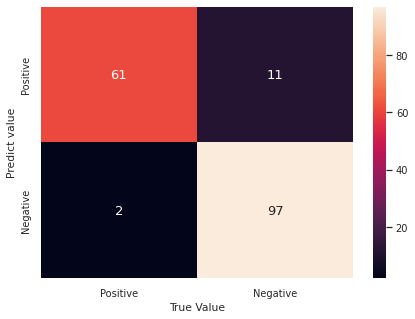

In [15]:
def Visualized_matrix(result):
  plt.figure(figsize=(7,5))
  sns.set(font_scale=0.9)
  res=[ [result[1],result[3]] , [result[4],result[2]] ]
  ax=sns.heatmap(res,annot=True, annot_kws={"size": 13},fmt='g',
  xticklabels=['Positive','Negative'],yticklabels=['Positive','Negative']) 
  ax.set(xlabel='True Value',ylabel='Predict value') 

def the_result(result):
    print("accuracy:",result[0],"\nprecison:",result[5],"\nrecall:",result[6],"\nf-measure:",result[7])

pred_LR= predicts(model_LR, X_test)

result=evaluation(pred_LR,y_test)
#print(result)
the_result(result)
Visualized_matrix(result)

int64
accuracy: 0.93567 
precison: 0.89394 
recall: 0.93651 
f-measure: 0.91473


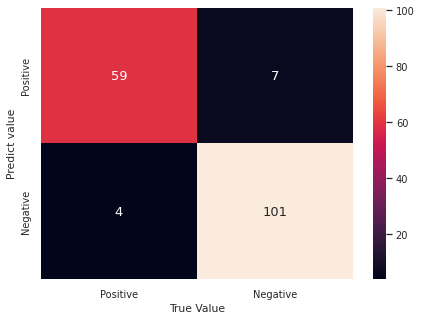

In [16]:
#Gini
from sklearn import tree
X_train,X_test,y_train,y_test=X_train0,X_test0,y_train0,y_test0
y_train,y_test=y_train.astype('int'),y_test.astype('int')
print(y_test.dtype)

model_g= tree.DecisionTreeClassifier(criterion='gini',max_depth=4)
model_g=model_g.fit(X_train,y_train)
pred_g=model_g.predict(X_test)
result=evaluation(pred_g,y_test)
#print(result)
the_result(result)
Visualized_matrix(result)

accuracy: 0.95322 
precison: 0.95082 
recall: 0.92063 
f-measure: 0.93548


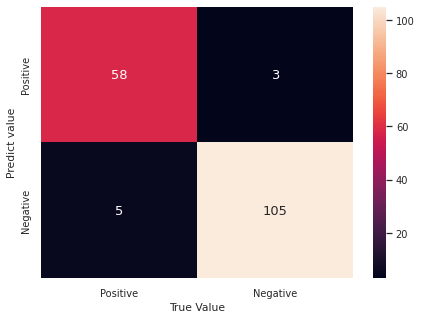

In [17]:
#entropy
model_e= tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
model_e=model_e.fit(X_train,y_train)
pred_e=model_e.predict(X_test)
result=evaluation(pred_e,y_test)
#print(result)
the_result(result)
Visualized_matrix(result)

accuracy: 0.95322 
precison: 0.95082 
recall: 0.92063 
f-measure: 0.93548


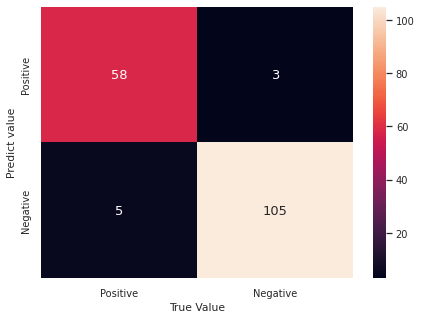

In [18]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_k= KNeighborsClassifier(n_neighbors=8)
model_k=model_k.fit(X_train,y_train)
pred_k=model_k.predict(X_test)
result=evaluation(pred_k,y_test)
#print(result)
the_result(result)
Visualized_matrix(result)

In [29]:
from sklearn.decomposition import PCA
file= pd.read_csv(path)

file=file.dropna(how='all',axis=1)
y=file.pop('diagnosis')
file.drop(labels='id',axis=1,inplace=True,errors='ignore')
y=y.to_numpy()
file=file.to_numpy()
np.place(y,y=='M',1)
np.place(y,y=='B',0)

pca = PCA(n_components=10)
pca.fit(file.T)
file_pca=pca.components_
min_max_scale(file_pca)
X_train,X_test,y_train,y_test=train_test_split(file_pca.T, y,test_size=0.3,random_state=0)
y_trainpd=pd.Series(y_train)
y_trainpd.value_counts()

0    249
1    149
dtype: int64

0
50
100
150
200
250
300
350
400
450
accuracy: 0.95906 
precison: 0.91176 
recall: 0.98413 
f-measure: 0.94656


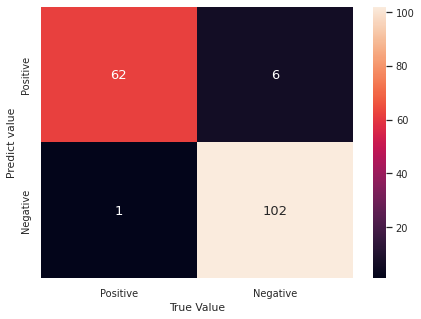

In [28]:
model_LR= Training(X_train,y_train,500,True)
pred_LR= predicts(model_LR, X_test)

result=evaluation(pred_LR,y_test)
#print(result)
the_result(result)
Visualized_matrix(result)